In [1]:
import SimpleITK as sitk
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

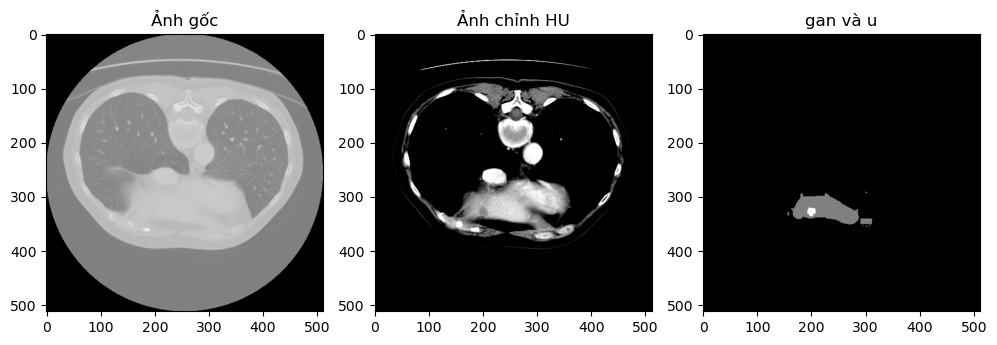

In [2]:
image_path = r'LiTS17v2\ct0\volume-15.nii'
mask_path = r'LiTS17v2\ct0\segmentation-15.nii'

image = sitk.ReadImage(image_path)
mask = sitk.ReadImage(mask_path)

clamp_filter = sitk.ClampImageFilter()
clamp_filter.SetLowerBound(-45)  
clamp_filter.SetUpperBound(167)

clamped_image = clamp_filter.Execute(image)

origin_array = sitk.GetArrayFromImage(image)
image_array = sitk.GetArrayFromImage(clamped_image)
mask_array = sitk.GetArrayFromImage(mask)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(origin_array[0], cmap='gray')
plt.title("Ảnh gốc")
plt.axis("on")

plt.subplot(1, 3, 2)
plt.imshow(image_array[0], cmap='gray')
plt.title("Ảnh chỉnh HU")
plt.axis("on")

plt.subplot(1, 3, 3)
plt.imshow(mask_array[0], cmap='gray')
plt.title("gan và u")
# plt.axis("on")

plt.tight_layout()
plt.show()

In [18]:
file_path = r'LiTS17\segmentation-0.nii'

image = sitk.ReadImage(file_path)


print("Metadata for", file_path)
print("Size:", image.GetSize())  # Kích thước ảnh (voxel)
print("Spacing:", image.GetSpacing())  # Khoảng cách voxel (mm)
print("Origin:", image.GetOrigin())  # Tọa độ gốc (mm)
print("Direction:", image.GetDirection())  # Ma trận định hướng
print("Pixel Type:", image.GetPixelIDTypeAsString())  # Kiểu dữ liệu voxel

Metadata for LiTS17\segmentation-0.nii
Size: (512, 512, 75)
Spacing: (0.703125, 0.703125, 5.0)
Origin: (-172.89999389648438, 179.296875, -368.0)
Direction: (1.0, 0.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0)
Pixel Type: 16-bit signed integer


In [17]:
nii_3d = sitk.ReadImage(r'LiTS17v2\ct0\volume-0.nii')
array_3d = sitk.GetArrayFromImage(nii_3d)  # shape: (C, H, W)

save_dir = 'slices_nifti'
os.makedirs(save_dir, exist_ok=True)

for i in range(array_3d.shape[0]):
    slice_2d = array_3d[i, :, :]
    slice_2d = np.expand_dims(slice_2d, axis=0)  # shape: (1, H, W)
    
    slice_image = sitk.GetImageFromArray(slice_2d)
    slice_image.CopyInformation(nii_3d)  # Giữ nguyên spacing, origin, direction

    sitk.WriteImage(slice_image, os.path.join(save_dir, f'slice_{i:03}.nii'))

In [3]:
df = pd.DataFrame({
    'min': [],
    'max': []
})
for i in range(28):
    ct_root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\volume-{i}.nii"
    image = sitk.ReadImage(ct_root)
    image = sitk.GetArrayFromImage(image)
    mask_root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\segmentation-{i}.nii"
    mask = sitk.ReadImage(mask_root)
    mask = sitk.GetArrayFromImage(mask)
    # print(image.shape)
    C, H, W = image.shape
    channels_with_one = []


    for c in range(C):
        if np.any(image[c] == 1):
            channels_with_one.append(c)


    # min_channel = min(channels_with_one)/image.shape[0]
    # max_channel = max(channels_with_one)/image.shape[0]
    # df.loc[len(df)] = [min_channel, max_channel]

    C = image.shape[0]
    start = int(C * 0.4)
    end = int(C * 0.9)
    image = image[start:end]
    # c = image.shape[0]
    # pad = (3-c%3)%3
    # image = np.pad(image, ((0,pad), (0,0), (0,0)), mode='constant', constant_values=0)
    image_split = image.reshape(-1,1,512,512)
    print(C, image_split.shape)


75 (37, 1, 512, 512)
123 (61, 1, 512, 512)
517 (259, 1, 512, 512)
534 (267, 1, 512, 512)
841 (420, 1, 512, 512)
537 (269, 1, 512, 512)
518 (259, 1, 512, 512)
541 (270, 1, 512, 512)
541 (270, 1, 512, 512)
549 (275, 1, 512, 512)
501 (250, 1, 512, 512)
466 (233, 1, 512, 512)
455 (227, 1, 512, 512)
605 (302, 1, 512, 512)
588 (294, 1, 512, 512)
565 (282, 1, 512, 512)
689 (345, 1, 512, 512)
826 (413, 1, 512, 512)
845 (422, 1, 512, 512)
547 (274, 1, 512, 512)
574 (287, 1, 512, 512)
437 (219, 1, 512, 512)
247 (124, 1, 512, 512)
391 (195, 1, 512, 512)
276 (138, 1, 512, 512)
601 (300, 1, 512, 512)
668 (334, 1, 512, 512)
861 (430, 1, 512, 512)


In [5]:
df.describe()

,min,max
count,103.000000,103.000000
mean,0.425654,0.834860
std,0.155547,0.137935
min,0.008403,0.548387
25%,0.349568,0.690125
50%,0.443169,0.921348
75%,0.538099,0.949790
max,0.647668,0.985612


In [16]:
sitk_image = sitk.GetImageFromArray(test_ct)

In [ ]:
sitk_image = sitk.GetImageFromArray(test_ct)
sitk.WriteImage(sitk_image, "output_volume.nii")

In [5]:
df = pd.DataFrame({
    'min': [],
    'max': []
})
for i in range(28, 131):
    root = rf"D:\DLFS\Unet\LiTS17\Training_Batch2\media\nas\01_Datasets\CT\LITS\Training Batch 2\segmentation-{i}.nii"
    image = sitk.ReadImage(root)
    image = sitk.GetArrayFromImage(image)

    C, H, W = image.shape
    channels_with_one = []


    for c in range(C):
        if np.any(image[c] == 2):
            channels_with_one.append(c)


    min_channel = min(channels_with_one)/image.shape[0]
    max_channel = max(channels_with_one)/image.shape[0]
    df.loc[len(df)] = [min_channel, max_channel]

ValueError: min() arg is an empty sequence

In [9]:
df.describe()

,min,max
count,28.000000,28.000000
mean,0.637512,0.773114
std,0.152032,0.154600
min,0.412192,0.512107
25%,0.499751,0.626037
50%,0.650672,0.856937
75%,0.763121,0.908151
max,0.905495,0.960000


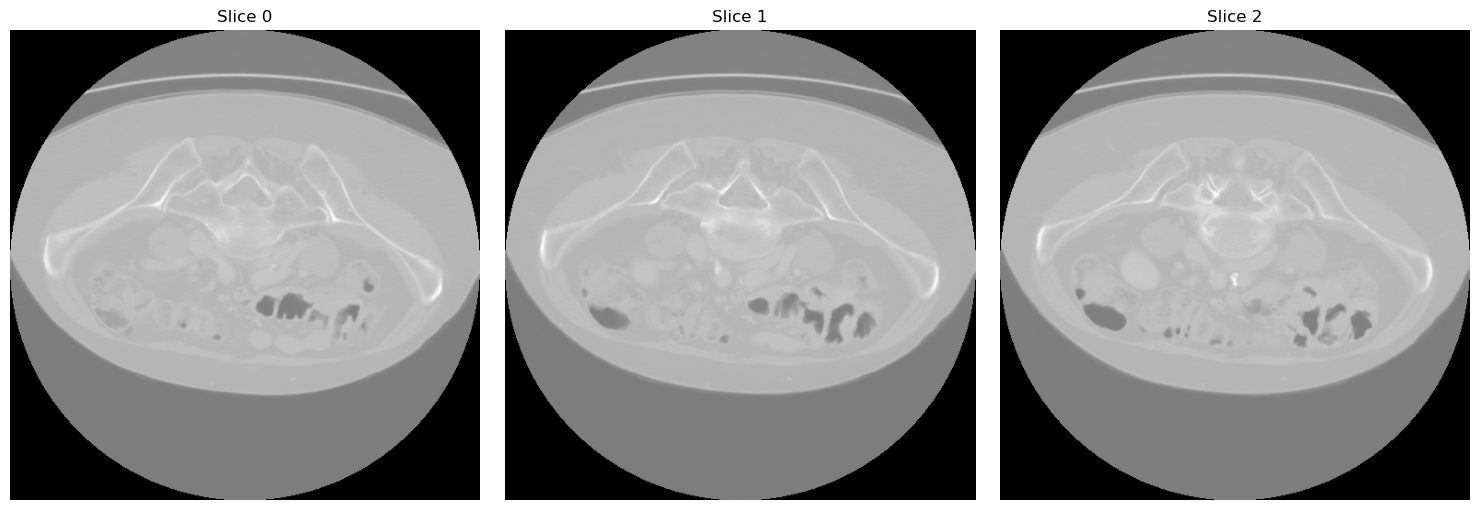

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Slice 0
plt.subplot(1, 3, 1)
plt.imshow(test_ct[0], cmap='gray')
plt.title("Slice 0")
plt.axis("off")

# Slice 1
plt.subplot(1, 3, 2)
plt.imshow(test_ct[1], cmap='gray')
plt.title("Slice 1")
plt.axis("off")

# Slice 2
plt.subplot(1, 3, 3)
plt.imshow(test_ct[2], cmap='gray')
plt.title("Slice 2")
plt.axis("off")

plt.tight_layout()
plt.show()


In [10]:
for i in range(10):
    ct_root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\volume-{i}.nii"
    image = sitk.ReadImage(ct_root)
    clamp_filter = sitk.ClampImageFilter()
    clamp_filter.SetLowerBound(-45)  
    clamp_filter.SetUpperBound(167)
    clamped_image = clamp_filter.Execute(image)
    image = sitk.GetArrayFromImage(clamped_image)
    mask_root = rf"D:\DLFS\Unet\LiTS17\Training_Batch1\media\nas\01_Datasets\CT\LITS\Training Batch 1\segmentation-{i}.nii"
    mask = sitk.ReadImage(mask_root)
    mask = sitk.GetArrayFromImage(mask)
    
    start = int(image.shape[0] * 0.6)
    end = int(image.shape[0] * 0.8)
    image = image[start:end]
    mask = mask[start:end]
    mask[mask == 1] = 0
    mask[mask == 2] = 1
    c = image.shape[0]
    image_split = image.reshape(-1,1,512,512)
    mask_split = mask.reshape(-1,1,512,512)
    print(image_split.shape, mask_split.shape)
    os.mkdir(rf'.\LiTSv4\ct{i}')
    for j in range(image_split.shape[0]):
        sitk_image = sitk.GetImageFromArray(image_split[j])
        sitk.WriteImage(sitk_image, rf".\LiTSv4\ct{i}\volume{j}.nii")
        sitk_mask = sitk.GetImageFromArray(mask_split[j])
        sitk.WriteImage(sitk_mask, rf".\LiTSv4\ct{i}\segmentation{j}.nii")

(15, 1, 512, 512) (15, 1, 512, 512)
(25, 1, 512, 512) (25, 1, 512, 512)
(103, 1, 512, 512) (103, 1, 512, 512)
(107, 1, 512, 512) (107, 1, 512, 512)
(168, 1, 512, 512) (168, 1, 512, 512)
(107, 1, 512, 512) (107, 1, 512, 512)
(104, 1, 512, 512) (104, 1, 512, 512)
(108, 1, 512, 512) (108, 1, 512, 512)
(108, 1, 512, 512) (108, 1, 512, 512)
(110, 1, 512, 512) (110, 1, 512, 512)


In [19]:
root = r'.\LiTS17'
tumor_slice=0
for i in range(131):
    mask_path = os.path.join(root, rf'segmentation-{i}.nii')
    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask)
    for j in range(mask.shape[0]):
        if np.any(mask[j] == 2):
            tumor_slice += 1    

In [21]:
tumor_slice

7190

In [ ]:
root = r'.\LiTS17v2'
tumor_slice=0
for i in range(131):
    mask_path = os.path.join(root, rf'segmentation-{i}.nii')
    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask)
    for j in range(mask.shape[0]):
        if np.any(mask[j] == 2):
            tumor_slice += 1 